<a href="https://colab.research.google.com/github/ugurtegin/Nonlinear_MMF_Network/blob/main/NoExp/SpokenDigit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import tensorflow as tf


from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.layers import Input, Activation, LSTM
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, AveragePooling2D 
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical, normalize

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
import scipy.io as sio
f = sio.loadmat('/content/drive/My Drive/Research/MMF_Reservoir/SpokenDigit/images.mat')
inp2 = f['images']

#Load data
f2 = sio.loadmat('/content/drive/My Drive/Research/MMF_Reservoir/SpokenDigit/label1.mat')

out = f2['label1']


In [3]:
#inp2 = inp / np.linalg.norm(inp)
#inp2 = inp2*1000

In [35]:
input_data = np.expand_dims(inp2, -1)
output_data = to_categorical(out.T)

print('input_data : ', input_data.shape, input_data.dtype)
print('output_class : ', output_data.shape, output_data.dtype)
print()

input_data :  (3000, 100, 100, 1) uint8
output_class :  (3000, 10) float32



In [36]:
oran = 0.20
X_train, X_test, y_train, y_test = train_test_split(input_data, output_data, test_size=oran)

print('Test data : ', X_test.shape, X_test.dtype)
print('Training data : ', X_train.shape, X_train.dtype)
print()

Test data :  (600, 100, 100, 1) uint8
Training data :  (2400, 100, 100, 1) uint8



In [56]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [57]:
loss='categorical_crossentropy' # mean_absolute_error, cosine_proximity
metrics = ['accuracy']  # network accuracy metric to be determined after each epoch, mean_absolute_error, cosine_proximity

opt1 = SGD(lr=0.001, momentum=0.9)
opt2 = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)

model.compile(optimizer=opt2, loss=loss, metrics=metrics)
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 98, 98, 32)        320       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 76832)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                768330    
Total params: 768,650
Trainable params: 768,650
Non-trainable params: 0
_________________________________________________________________


In [58]:
#setting final parameters for the network and it begins to train
number_of_iterations = 50
batch_size = 50

#history=model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=number_of_iterations)
history=model.fit(X_train, y_train, batch_size=batch_size, epochs=number_of_iterations, verbose=1, validation_data=(X_test, y_test))
#Number of iterations run: 900

Epoch 1/50
48/48 [==============================] - 0s 9ms/step - loss: 651.5187 - accuracy: 0.1500 - val_loss: 63.5574 - val_accuracy: 0.3717
Epoch 2/50
48/48 [==============================] - 0s 6ms/step - loss: 12.2469 - accuracy: 0.6529 - val_loss: 2.6149 - val_accuracy: 0.8150
Epoch 3/50
48/48 [==============================] - 0s 6ms/step - loss: 2.0226 - accuracy: 0.8546 - val_loss: 2.6551 - val_accuracy: 0.7867
Epoch 4/50
48/48 [==============================] - 0s 6ms/step - loss: 1.2803 - accuracy: 0.8796 - val_loss: 1.8655 - val_accuracy: 0.8367
Epoch 5/50
48/48 [==============================] - 0s 6ms/step - loss: 0.6750 - accuracy: 0.9162 - val_loss: 1.0338 - val_accuracy: 0.8950
Epoch 6/50
48/48 [==============================] - 0s 6ms/step - loss: 0.4325 - accuracy: 0.9421 - val_loss: 1.7337 - val_accuracy: 0.8550
Epoch 7/50
48/48 [==============================] - 0s 6ms/step - loss: 0.2997 - accuracy: 0.9592 - val_loss: 1.1459 - val_accuracy: 0.8917
Epoch 8/50
48/48

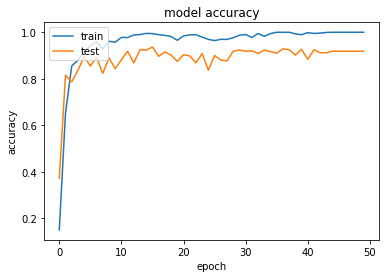

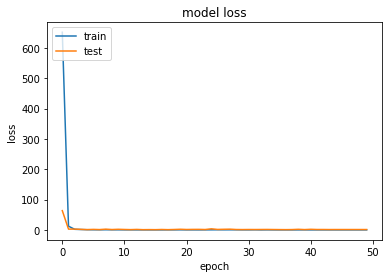

In [59]:
from google.colab import files
# summarize history for loss
ls=plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.ylim(0.02,0.4)
ls.show()

ls=plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
#plt.ylim(0.02,0.4)
ls.show()
#ls.savefig('/content/drive/My Drive/Sinc/loss-exp.png')
#files.download('loss-1.png')

In [60]:
abit = model.predict(np.expand_dims(inp2, -1))
abit.shape

(3000, 10)

In [61]:
abit = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print('MSE ' + str(mean_squared_error(abit, y_test)))
print('RMSE ' + str(np.sqrt(mean_squared_error(abit, y_test))))

MSE 0.015537163
RMSE 0.12464816


In [62]:
abit = model.predict(np.expand_dims(inp2, -1))
from sklearn.metrics import mean_squared_error
print('MSE ' + str(mean_squared_error(abit, output_data)))
print('RMSE ' + str(np.sqrt(mean_squared_error(abit, output_data))))

MSE 0.0031074327
RMSE 0.05574435
